<a href="https://colab.research.google.com/github/DHARUN033/MachineLearning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Books_ul.csv to Books_ul.csv


In [ ]:
data=pd.read_csv('Books_ul.csv')
data

,bookID,Title,Authors,Average_Rating,Num_Pages,Ratings_Count,Text_Reviews_Count,Publication_Date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,9/16/2006,NaN,NaN,NaN,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,09-01-04,NaN,NaN,NaN,NaN,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,11-01-03,NaN,NaN,NaN,NaN,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,05-01-04,NaN,NaN,NaN,NaN,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,9/13/2004,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,512,156,20,12/21/2004,NaN,NaN,NaN,NaN,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,635,783,56,12-01-88,NaN,NaN,NaN,NaN,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,415,820,95,08-01-93,NaN,NaN,NaN,NaN,NaN
11125,45639,Poor People,William T. Vollmann,3.72,434,769,139,2/27/2007,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

,0
bookID,0
Title,0
Authors,0
Average_Rating,0
Num_Pages,0
Ratings_Count,0
Text_Reviews_Count,0
Publication_Date,0


In [ ]:
data.info()
# data[['Num_Pages','Average_Rating']] = data[['Num_Pages','Average_Rating']].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   Title               11127 non-null  object
 2   Authors             11127 non-null  object
 3   Average_Rating      11127 non-null  object
 4   Num_Pages           11127 non-null  object
 5   Ratings_Count       11127 non-null  int64 
 6   Text_Reviews_Count  11127 non-null  int64 
 7   Publication_Date    11127 non-null  object
dtypes: int64(3), object(5)
memory usage: 695.6+ KB


In [ ]:
X=data['Num_Pages']
Y=data['Average_Rating']

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [ ]:
model=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage='single')
labels=model.fit_predict(X.astype(int),Y.astype(int))

ValueError: invalid literal for int() with base 10: 'en-US'

In [ ]:
data.info()
data = data.astype({'Num_Pages': 'int', 'Publication_Date': 'int'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   Title               11127 non-null  object
 2   Authors             11127 non-null  object
 3   Average_Rating      11127 non-null  object
 4   Num_Pages           11127 non-null  object
 5   Ratings_Count       11127 non-null  int64 
 6   Text_Reviews_Count  11127 non-null  int64 
 7   Publication_Date    11127 non-null  object
dtypes: int64(3), object(5)
memory usage: 695.6+ KB


ValueError: invalid literal for int() with base 10: 'en-US': Error while type casting for column 'Num_Pages'

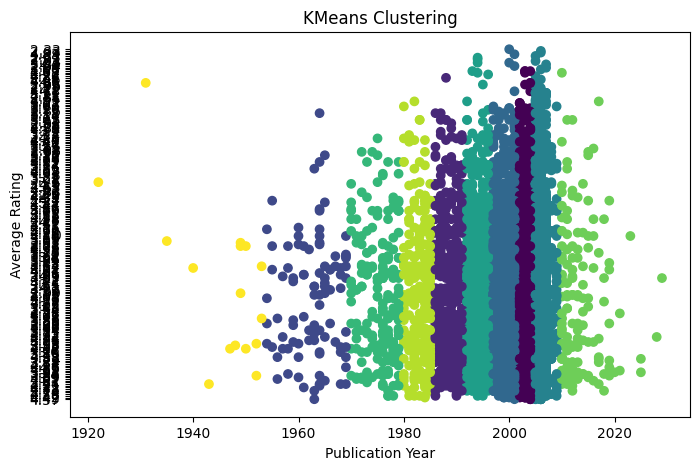

In [ ]:
df = pd.read_csv('/content/Books_ul.csv')

# 2. Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# 3. Convert Publication_Date to year as integer
def get_year(val):
    import re
    val = str(val)
    # Get 4-digit year at the end of string
    result = re.findall(r'(\d{4})$', val)
    if result:
        return int(result[0])
    # If only 2 digits, guess the century
    result2 = re.findall(r'(\d{2})$', val)
    if result2:
        year = int(result2[0])
        return 2000 + year if year < 30 else 1900 + year
    return None

df['Year'] = df['Publication_Date'].apply(get_year)

# 4. Drop missing values in required columns
df = df.dropna(subset=['Average_Rating', 'Year'])

# 5. Prepare features for KMeans
X = df[['Average_Rating', 'Year']]

# 6. Fit KMeans (for example: 3 clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 7. Plot the clusters
plt.figure(figsize=(8,5))
plt.scatter(df['Year'], df['Average_Rating'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.title('KMeans Clustering')
plt.show()